# SE Summative 1: NOMIS Population Estimates Analysis 

## Required Libraries

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

## Data Collection

In [4]:
def fetch_population_data(time_value):
    BASE = "https://www.nomisweb.co.uk/api/v01"
    DATASET = "NM_2002_1"   # Population estimates dataset
    params = {
        "time": time_value,
        "measures": 20100,         # value (not percent)
        "gender": 0,               # combined total
        "c_age": 203,              # Individuals aged 16–64
    }
    url = f"{BASE}/dataset/{DATASET}.data.csv"
    resp = requests.get(url, params=params, timeout=60)
    return pd.read_csv(StringIO(resp.text))

df_23 = fetch_population_data("2023")
df_24 = fetch_population_data("2024")

In [4]:
df_23.head()

,DATE,DATE_NAME,DATE_CODE,DATE_TYPE,DATE_TYPECODE,DATE_SORTORDER,GEOGRAPHY,GEOGRAPHY_NAME,GEOGRAPHY_CODE,GEOGRAPHY_TYPE,...,MEASURES,MEASURES_NAME,OBS_VALUE,OBS_STATUS,OBS_STATUS_NAME,OBS_CONF,OBS_CONF_NAME,URN,RECORD_OFFSET,RECORD_COUNT
0,2023,2023,2023,date,0,0,1774190593,Hartlepool,E06000001,local authorities: county / unitary (as of Apr...,...,20100,Value,58719.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32368e1d1774190593d0d203d20100,0,3056
1,2023,2023,2023,date,0,0,1774190594,Middlesbrough,E06000002,local authorities: county / unitary (as of Apr...,...,20100,Value,96747.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32368e1d1774190594d0d203d20100,1,3056
2,2023,2023,2023,date,0,0,1774190595,Redcar and Cleveland,E06000003,local authorities: county / unitary (as of Apr...,...,20100,Value,81130.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32368e1d1774190595d0d203d20100,2,3056
3,2023,2023,2023,date,0,0,1774190596,Stockton-on-Tees,E06000004,local authorities: county / unitary (as of Apr...,...,20100,Value,125126.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32368e1d1774190596d0d203d20100,3,3056
4,2023,2023,2023,date,0,0,1774190597,Darlington,E06000005,local authorities: county / unitary (as of Apr...,...,20100,Value,67808.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32368e1d1774190597d0d203d20100,4,3056


In [5]:
df_24.head()

,DATE,DATE_NAME,DATE_CODE,DATE_TYPE,DATE_TYPECODE,DATE_SORTORDER,GEOGRAPHY,GEOGRAPHY_NAME,GEOGRAPHY_CODE,GEOGRAPHY_TYPE,...,MEASURES,MEASURES_NAME,OBS_VALUE,OBS_STATUS,OBS_STATUS_NAME,OBS_CONF,OBS_CONF_NAME,URN,RECORD_OFFSET,RECORD_COUNT
0,2024,2024,2024,date,0,0,1774190593,Hartlepool,E06000001,local authorities: county / unitary (as of Apr...,...,20100,Value,59988.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32384e0d1774190593d0d203d20100,0,3056
1,2024,2024,2024,date,0,0,1774190594,Middlesbrough,E06000002,local authorities: county / unitary (as of Apr...,...,20100,Value,98418.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32384e0d1774190594d0d203d20100,1,3056
2,2024,2024,2024,date,0,0,1774190595,Redcar and Cleveland,E06000003,local authorities: county / unitary (as of Apr...,...,20100,Value,81553.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32384e0d1774190595d0d203d20100,2,3056
3,2024,2024,2024,date,0,0,1774190596,Stockton-on-Tees,E06000004,local authorities: county / unitary (as of Apr...,...,20100,Value,126844.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32384e0d1774190596d0d203d20100,3,3056
4,2024,2024,2024,date,0,0,1774190597,Darlington,E06000005,local authorities: county / unitary (as of Apr...,...,20100,Value,68652.0,A,Normal Value,F,Free (free for publication),Nm-2002d1d32384e0d1774190597d0d203d20100,4,3056


## Data Filtering

In [5]:
def filter_population_df(df):
    filtered_df = df[df['GEOGRAPHY_TYPE'] == 'regions']
    filtered_df = filtered_df[['DATE','GEOGRAPHY_CODE', 'GEOGRAPHY_NAME', 'OBS_VALUE']]
    filtered_df.rename(columns={'DATE': 'YEAR', 'GEOGRAPHY_NAME': 'REGION', 'OBS_VALUE': 'COUNT OF POPULATION'}, inplace=True)
    return filtered_df

filtered_df_23 = filter_population_df(df_23)
filtered_df_24 = filter_population_df(df_24)

display(filtered_df_23)
display(filtered_df_24)

,YEAR,GEOGRAPHY_CODE,REGION,COUNT OF POPULATION
3037,2023,E12000001,North East,1684158.0
3038,2023,E12000002,North West,4774559.0
3039,2023,E12000003,Yorkshire and The Humber,3495366.0
3040,2023,E12000004,East Midlands,3112252.0
3041,2023,E12000005,West Midlands,3773066.0
3042,2023,E12000006,East,3981458.0
3043,2023,E12000007,London,6208153.0
3044,2023,E12000008,South East,5880425.0
3045,2023,E12000009,South West,3532288.0
3046,2023,W92000004,Wales,1935045.0


,YEAR,GEOGRAPHY_CODE,REGION,COUNT OF POPULATION
3037,2024,E12000001,North East,1706169.0
3038,2024,E12000002,North West,4840994.0
3039,2024,E12000003,Yorkshire and The Humber,3533340.0
3040,2024,E12000004,East Midlands,3146117.0
3041,2024,E12000005,West Midlands,3824226.0
3042,2024,E12000006,East,4028657.0
3043,2024,E12000007,London,6275855.0
3044,2024,E12000008,South East,5947376.0
3045,2024,E12000009,South West,3568027.0
3046,2024,W92000004,Wales,1947716.0


## Data Visualisations

### Visualisation 1: Bar Chart of 2023

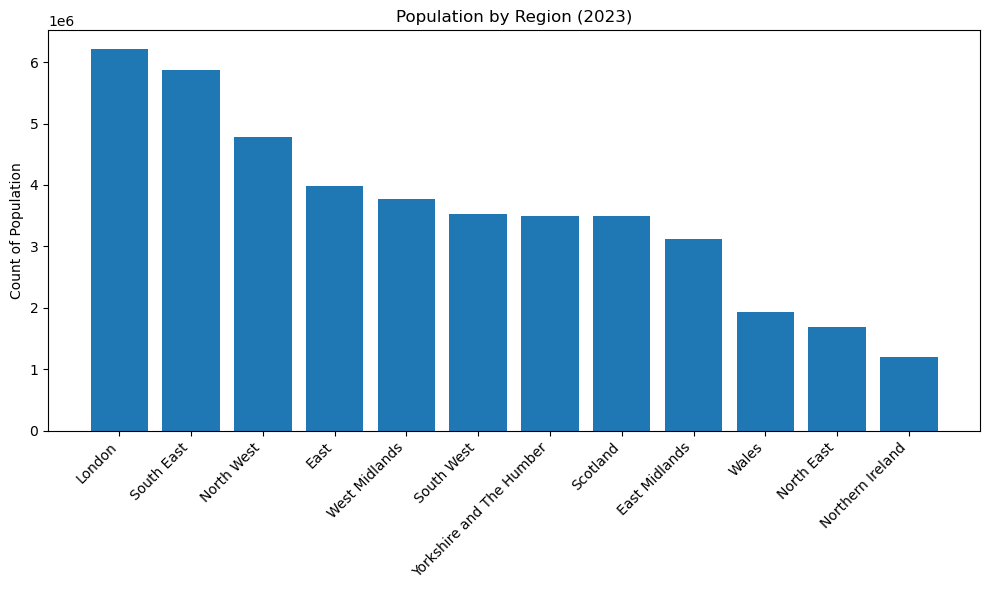

In [7]:
def plot_population_by_region_2023(filtered_df_23):
    # Bar chart of population by region for 2023
    plt.figure(figsize=(10,6))
    df_plot = filtered_df_23.sort_values('COUNT OF POPULATION', ascending=False)
    plt.bar(df_plot['REGION'], df_plot['COUNT OF POPULATION'], color='C0')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count of Population')
    plt.title('Population by Region (2023)')
    plt.tight_layout()
    plt.show()

plot_population_by_region_2023(filtered_df_23)

### Visualisation 2: Pie Chart of 2024

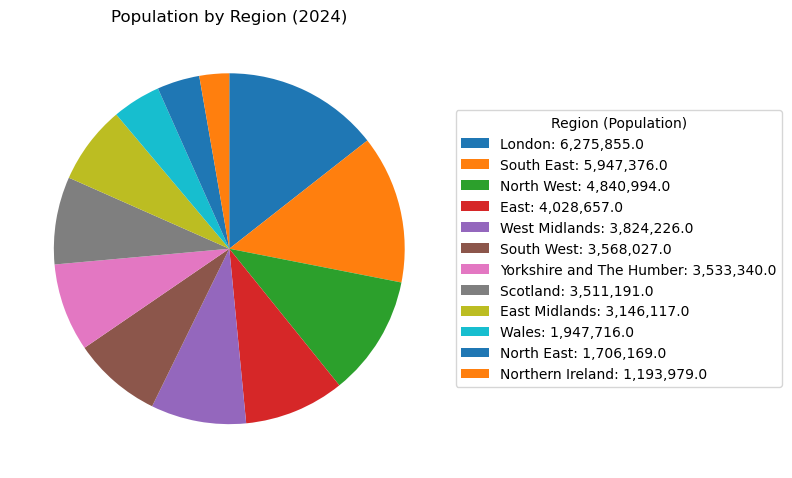

In [12]:
def pie_population_by_region(filtered_df_24):
    plt.figure(figsize=(8, 8))
    df_plot = filtered_df_24.sort_values('COUNT OF POPULATION', ascending=False)

    values = df_plot['COUNT OF POPULATION']
    labels = df_plot['REGION']
    label_values = [f"{region}: {value:,}" for region, value in zip(labels, values)]

    wedges, _ = plt.pie(
        values,
        labels=None,
        startangle=90,
        counterclock=False
    )
    plt.legend(wedges, label_values, title="Region (Population)", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.title('Population by Region (2024)')
    plt.tight_layout()
    plt.show()

pie_population_by_region(filtered_df_24)

### Visualisation 3: Barchart Percentage Change Between Two Years By Region

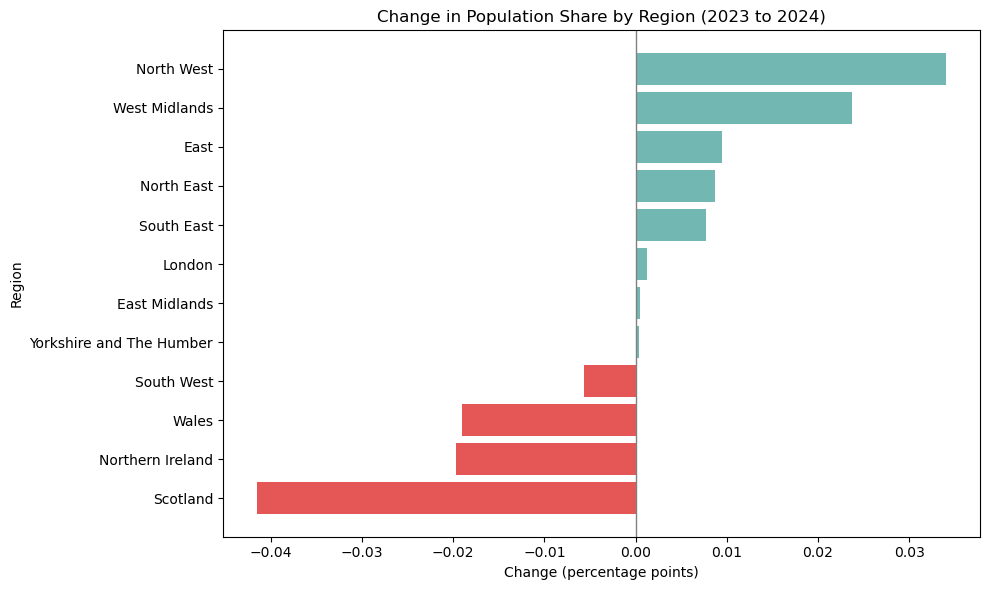

In [ ]:
def plot_population_share_change(filtered_df_23, filtered_df_24):
    df23 = filtered_df_23.copy(); df23['YEAR'] = 2023
    df24 = filtered_df_24.copy(); df24['YEAR'] = 2024
    df_all = pd.concat([df23, df24], ignore_index=True)

    # Compute total by year, then share (% of UK total)
    totals = df_all.groupby('YEAR')['COUNT OF POPULATION'].sum()
    df_all['SHARE_%'] = df_all.apply(lambda r: r['COUNT OF POPULATION'] / totals.loc[r['YEAR']] * 100, axis=1)

    wide_share = df_all.pivot_table(index='REGION', columns='YEAR', values='SHARE_%', aggfunc='sum')
    wide_share['PP_CHANGE'] = wide_share[2024] - wide_share[2023]  # percentage point change

    plot_df = wide_share.sort_values('PP_CHANGE', ascending=True)

    plt.figure(figsize=(10, 6))
    colors = np.where(plot_df['PP_CHANGE'] >= 0, '#72B7B2', '#E45756')
    plt.barh(plot_df.index, plot_df['PP_CHANGE'], color=colors)

    plt.xlabel('Change (percentage points)')
    plt.ylabel('Region')
    plt.title('Change in Population Share by Region (2023 to 2024)')
    plt.axvline(0, color='grey', linewidth=1)
    plt.tight_layout()
    plt.show()

plot_population_share_change(filtered_df_23, filtered_df_24)